<center> <h1> <b>Song Birds<b></h1> </center>
<center> <h1>Model Automatization and Code Update</h1> </center>

# Import Libraries, Functions, and Classes

In [1]:
from birdsongs.functions import *
from birdsongs.song  import Song
from birdsongs.plots import Ploter
from birdsongs.paths import Paths
from birdsongs.optimizer import Optimizer

C:\Users\sebas\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
root_path = "C:\\Users\\sebas\\Documents\\GitHub\\" # root_path = '/home/siete/Downloads/audios/'
bird_name = "Zonotrichia capensis"

paths  = Paths(root_path, bird_name)
ploter = Ploter(save=True)

The folder has 91 songs


Looking for all wav files in path folder and audios path

# Song 

In [3]:
no_file = 1 # int(input("Enter the number of song (1 to {0}): ".format(paths.no_files)))
bird    = Song(paths, no_file)   

The son has 4 syllables


## Plot

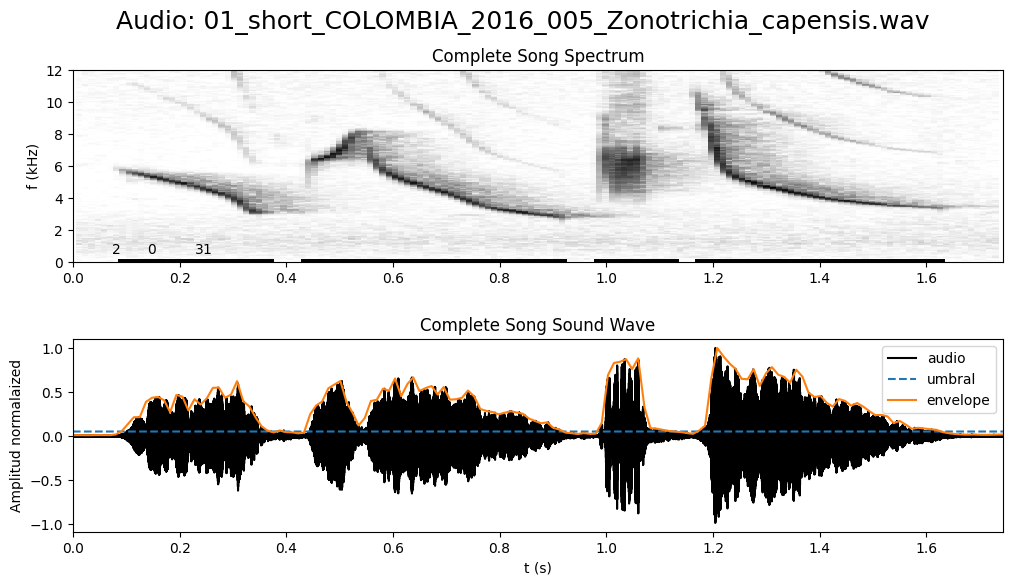

In [4]:
ploter.PlotSong(bird)

select a region of the audio, add to song class time selection

# Syllable i-th

## Definition

In [5]:
no_syllable    = 1 # int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
syllable       = bird.Syllable(no_syllable)
syllable_synth = syllable.Solve(bird.p)

## Plot

name,value,initial value,min,max,vary
a0,0.01000000,0.11,0.00000000,0.25000000,False
a1,0.05000000,0.05,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.20000000,2.00000000,False
b2,0.00000000,0.0,0.00000000,3.00000000,False
gm,40000.0000,40000.0,10000.0000,100000.000,False


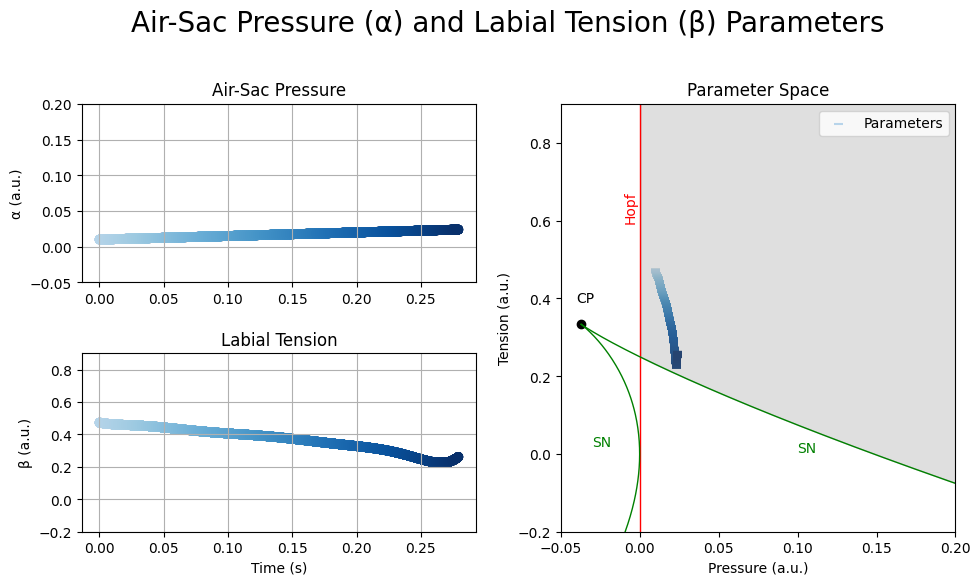

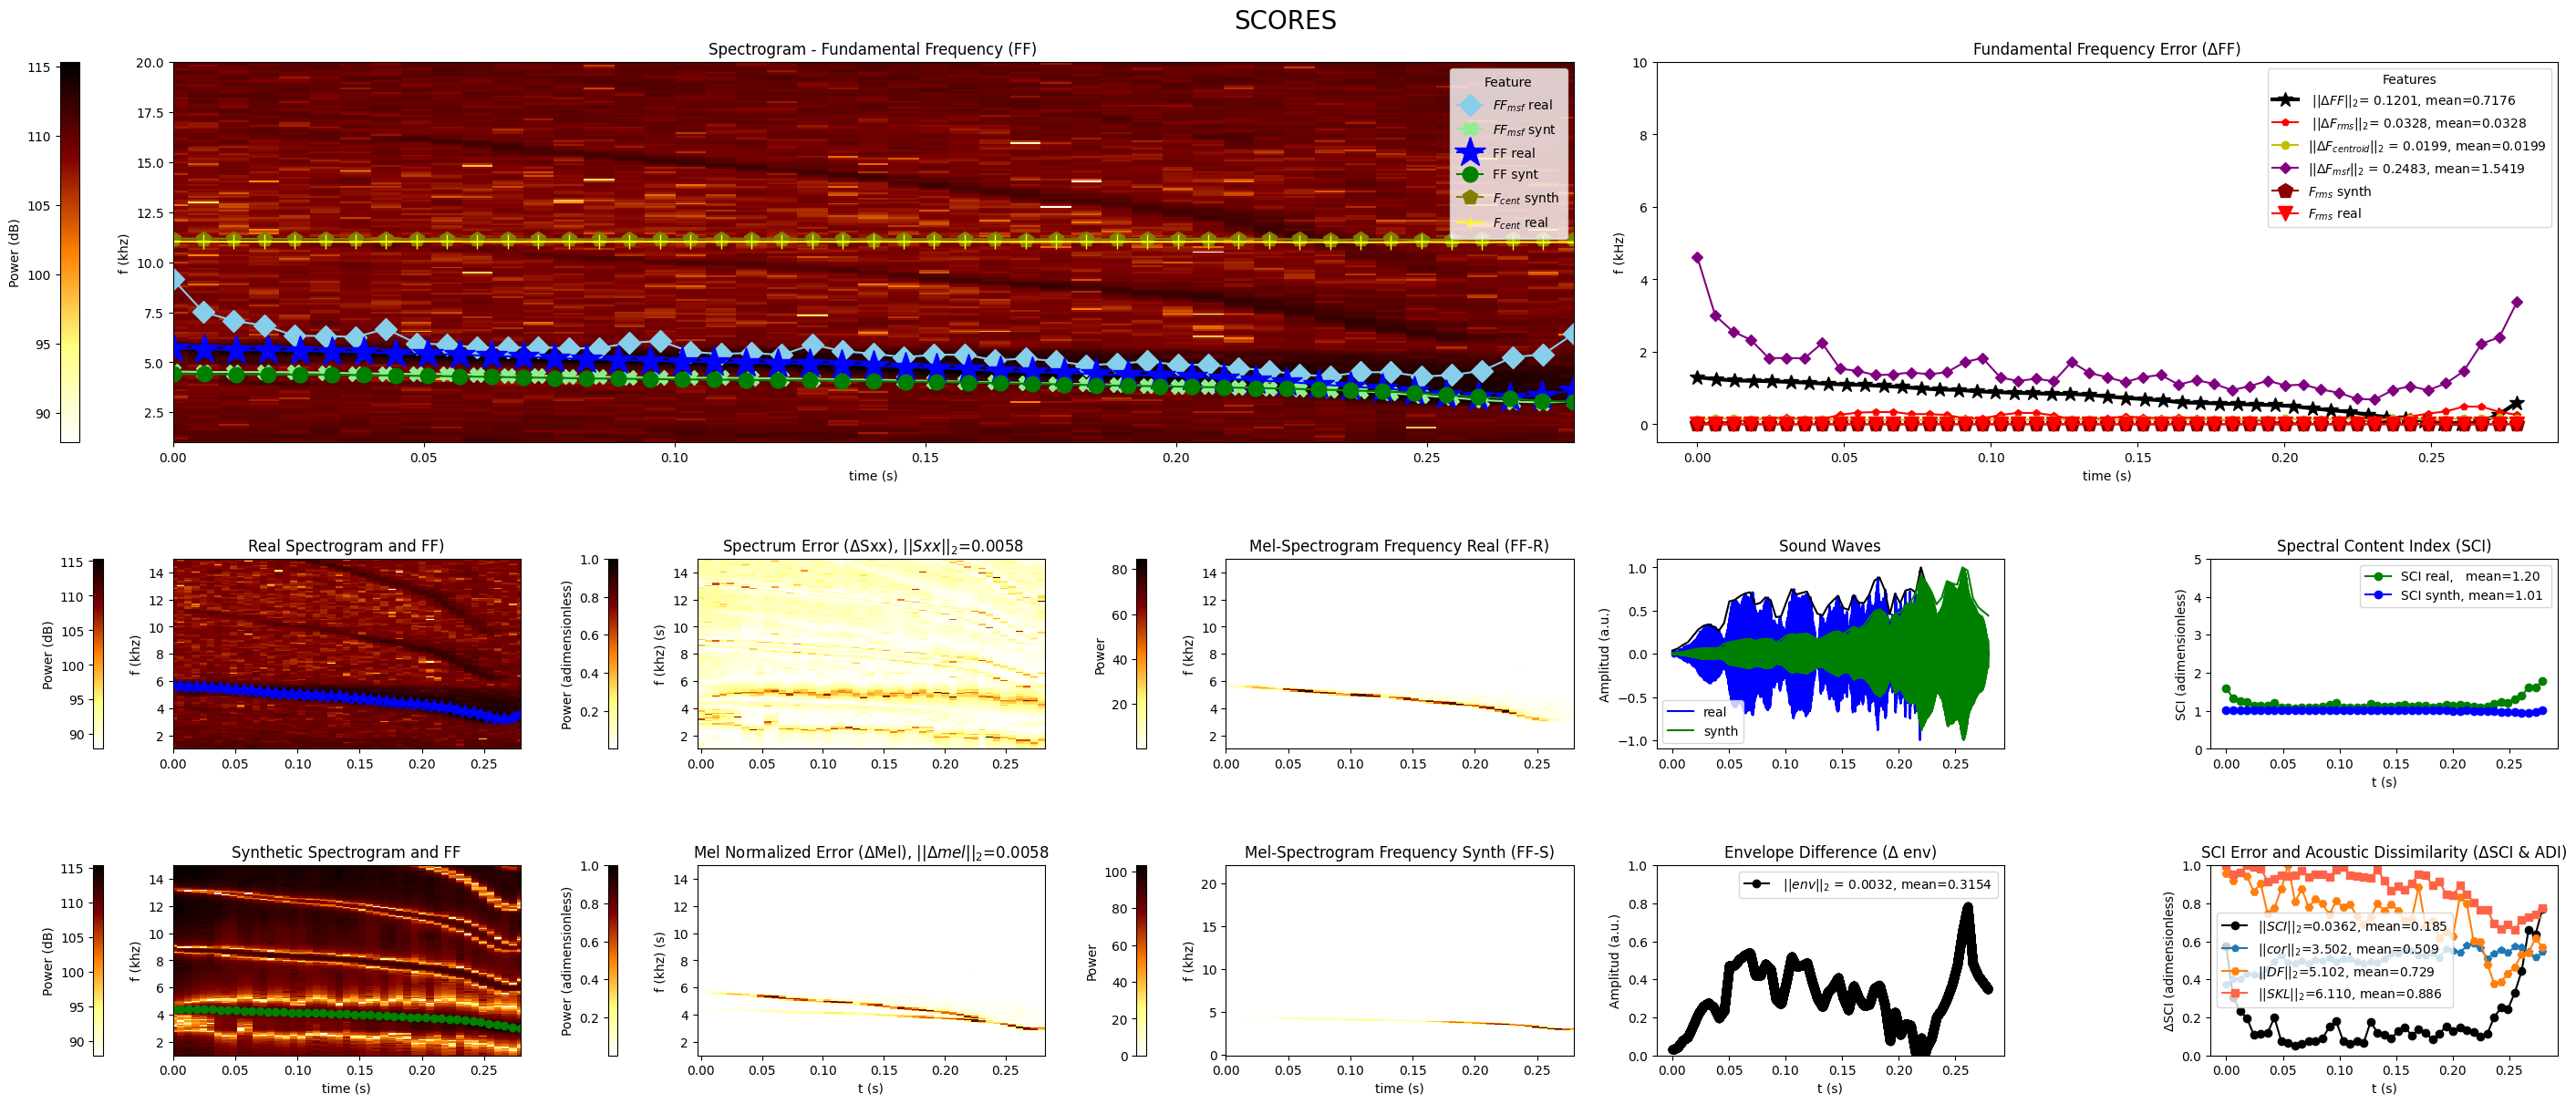

Wall time: 17.2 s


In [6]:
%%time
syllable.p["a0"].set(value=0.01)
syllable_synth = syllable.Solve(bird.p)
Display(syllable.p)

# ploter.PlotSynth(syllable)
# ploter.PlotVs(save=True)
ploter.PlotAlphaBeta(syllable)
ploter.Plot(syllable, syllable_synth)

name,value,initial value,min,max,vary
a0,0.11000000,0.11,0.00000000,0.25000000,False
a1,0.05000000,0.05,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.20000000,2.00000000,False
b2,0.00000000,0.0,0.00000000,3.00000000,False
gm,40000.0000,40000.0,10000.0000,100000.000,False


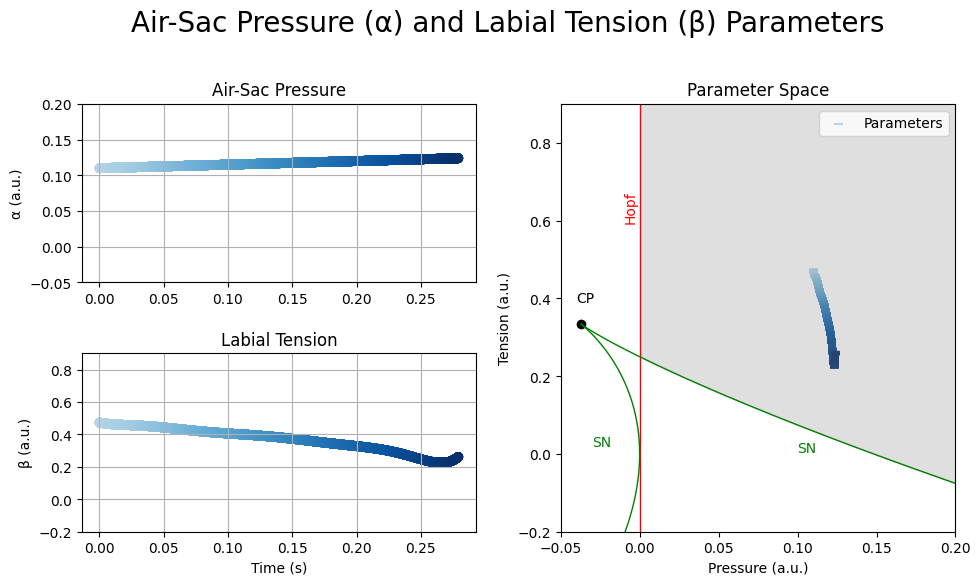

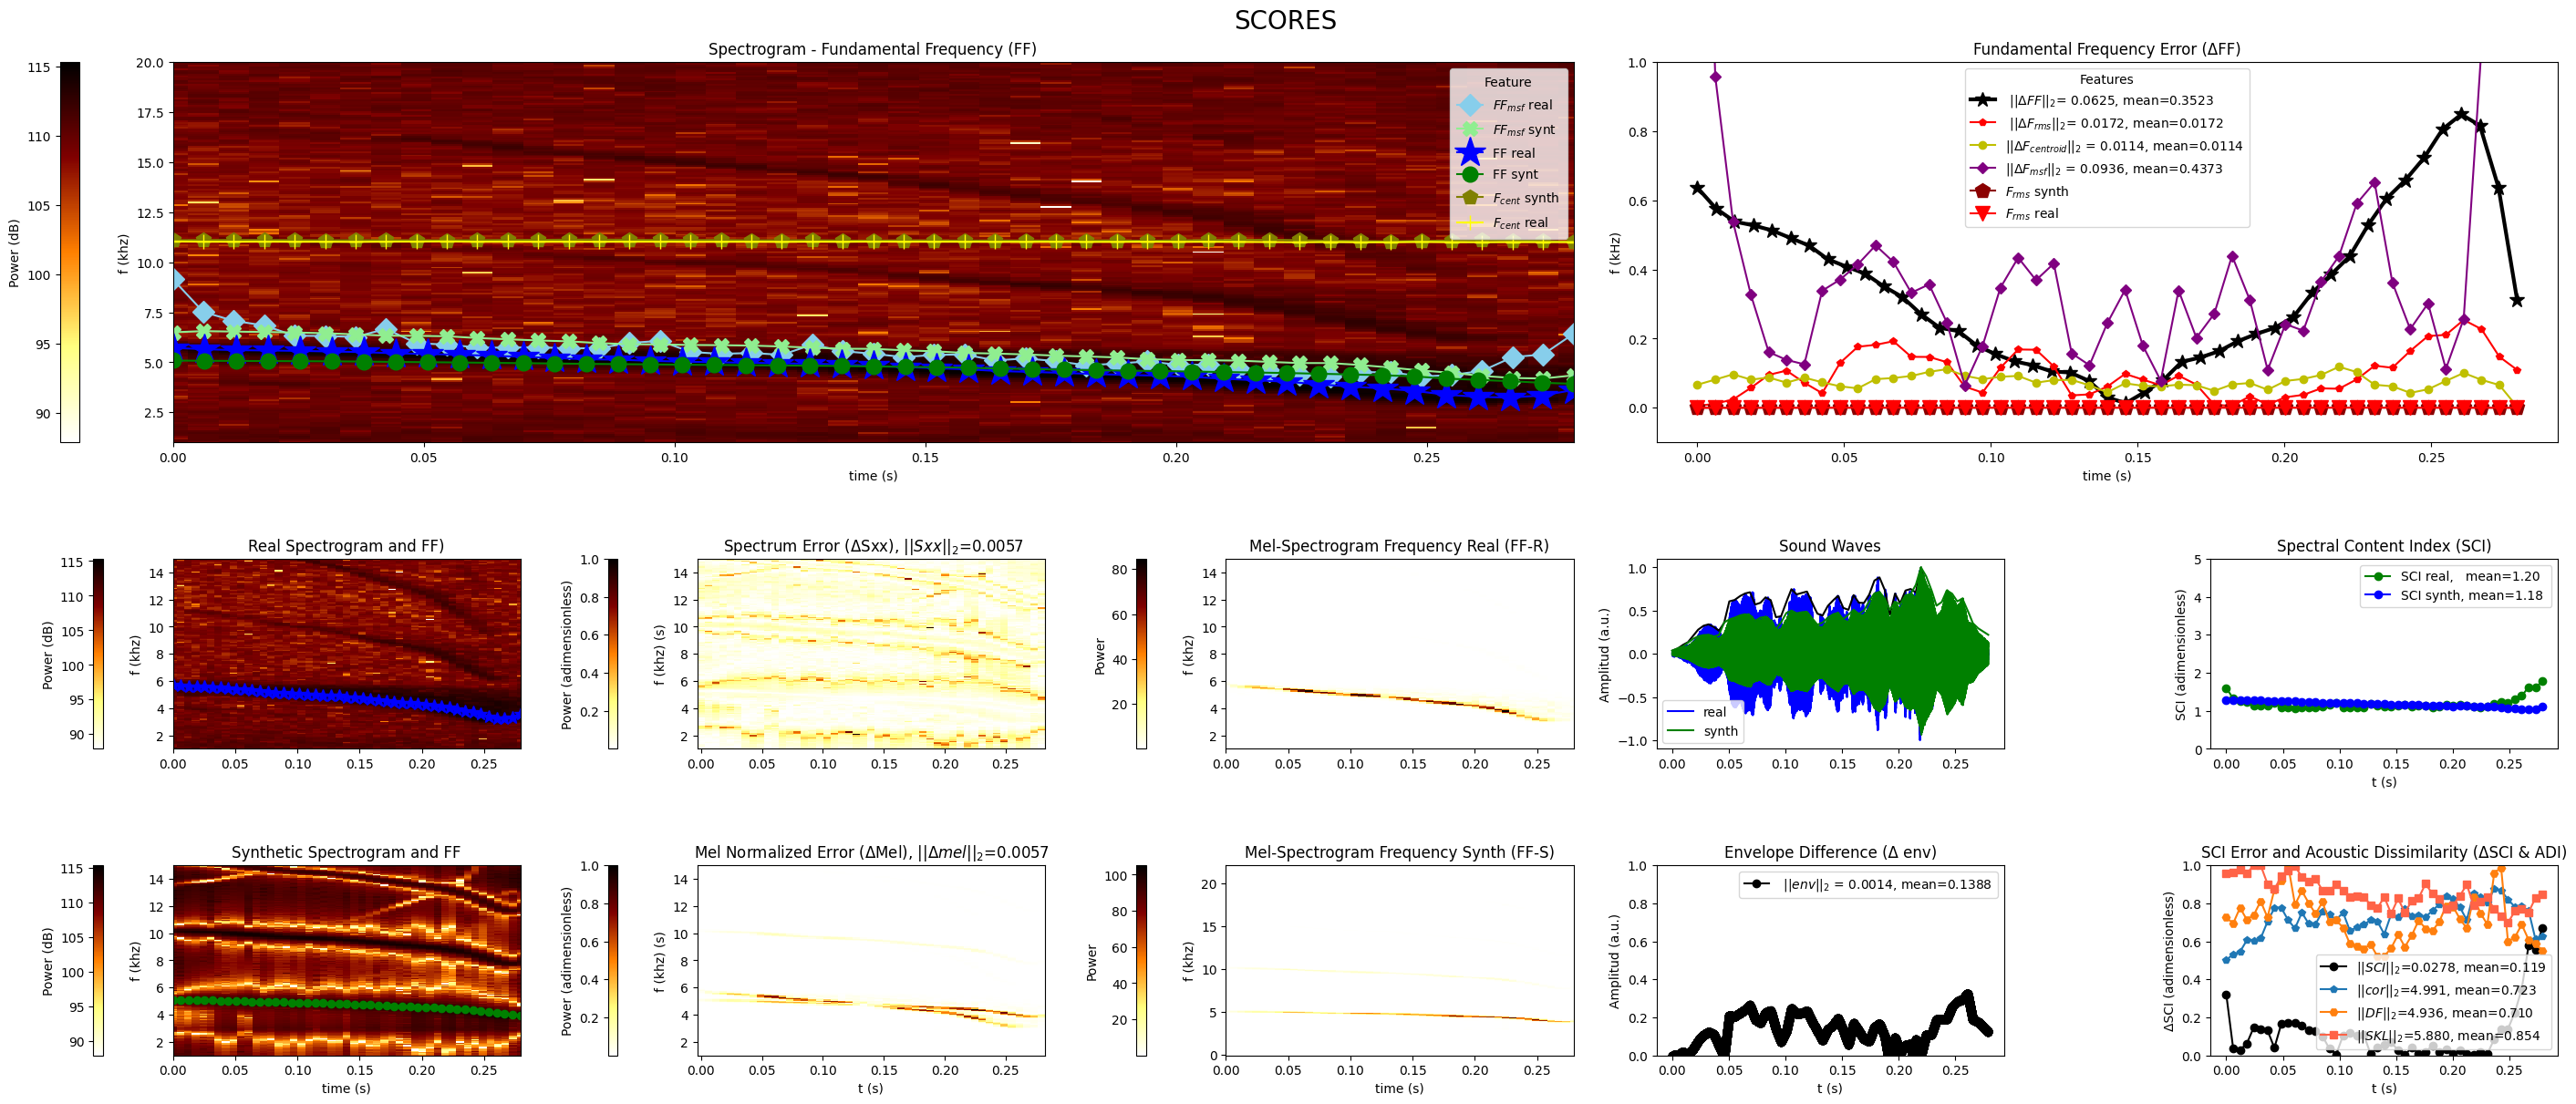

In [7]:
syllable.p["a0"].set(value=0.11)
syllable_synth = syllable.Solve(bird.p)
Display(syllable.p)

syllable_synth = syllable.Solve(syllable.p)

ploter.PlotAlphaBeta(syllable)
ploter.Plot(syllable, syllable_synth)

name,value,initial value,min,max,vary
a0,0.25000000,0.11,0.00000000,0.25000000,False
a1,0.05000000,0.05,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.20000000,2.00000000,False
b2,0.00000000,0.0,0.00000000,3.00000000,False
gm,40000.0000,40000.0,10000.0000,100000.000,False


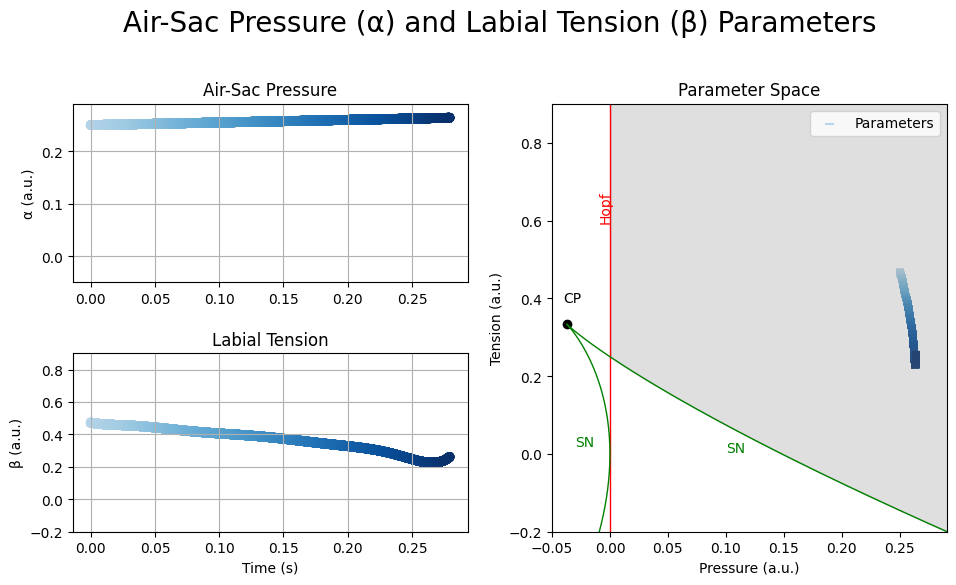

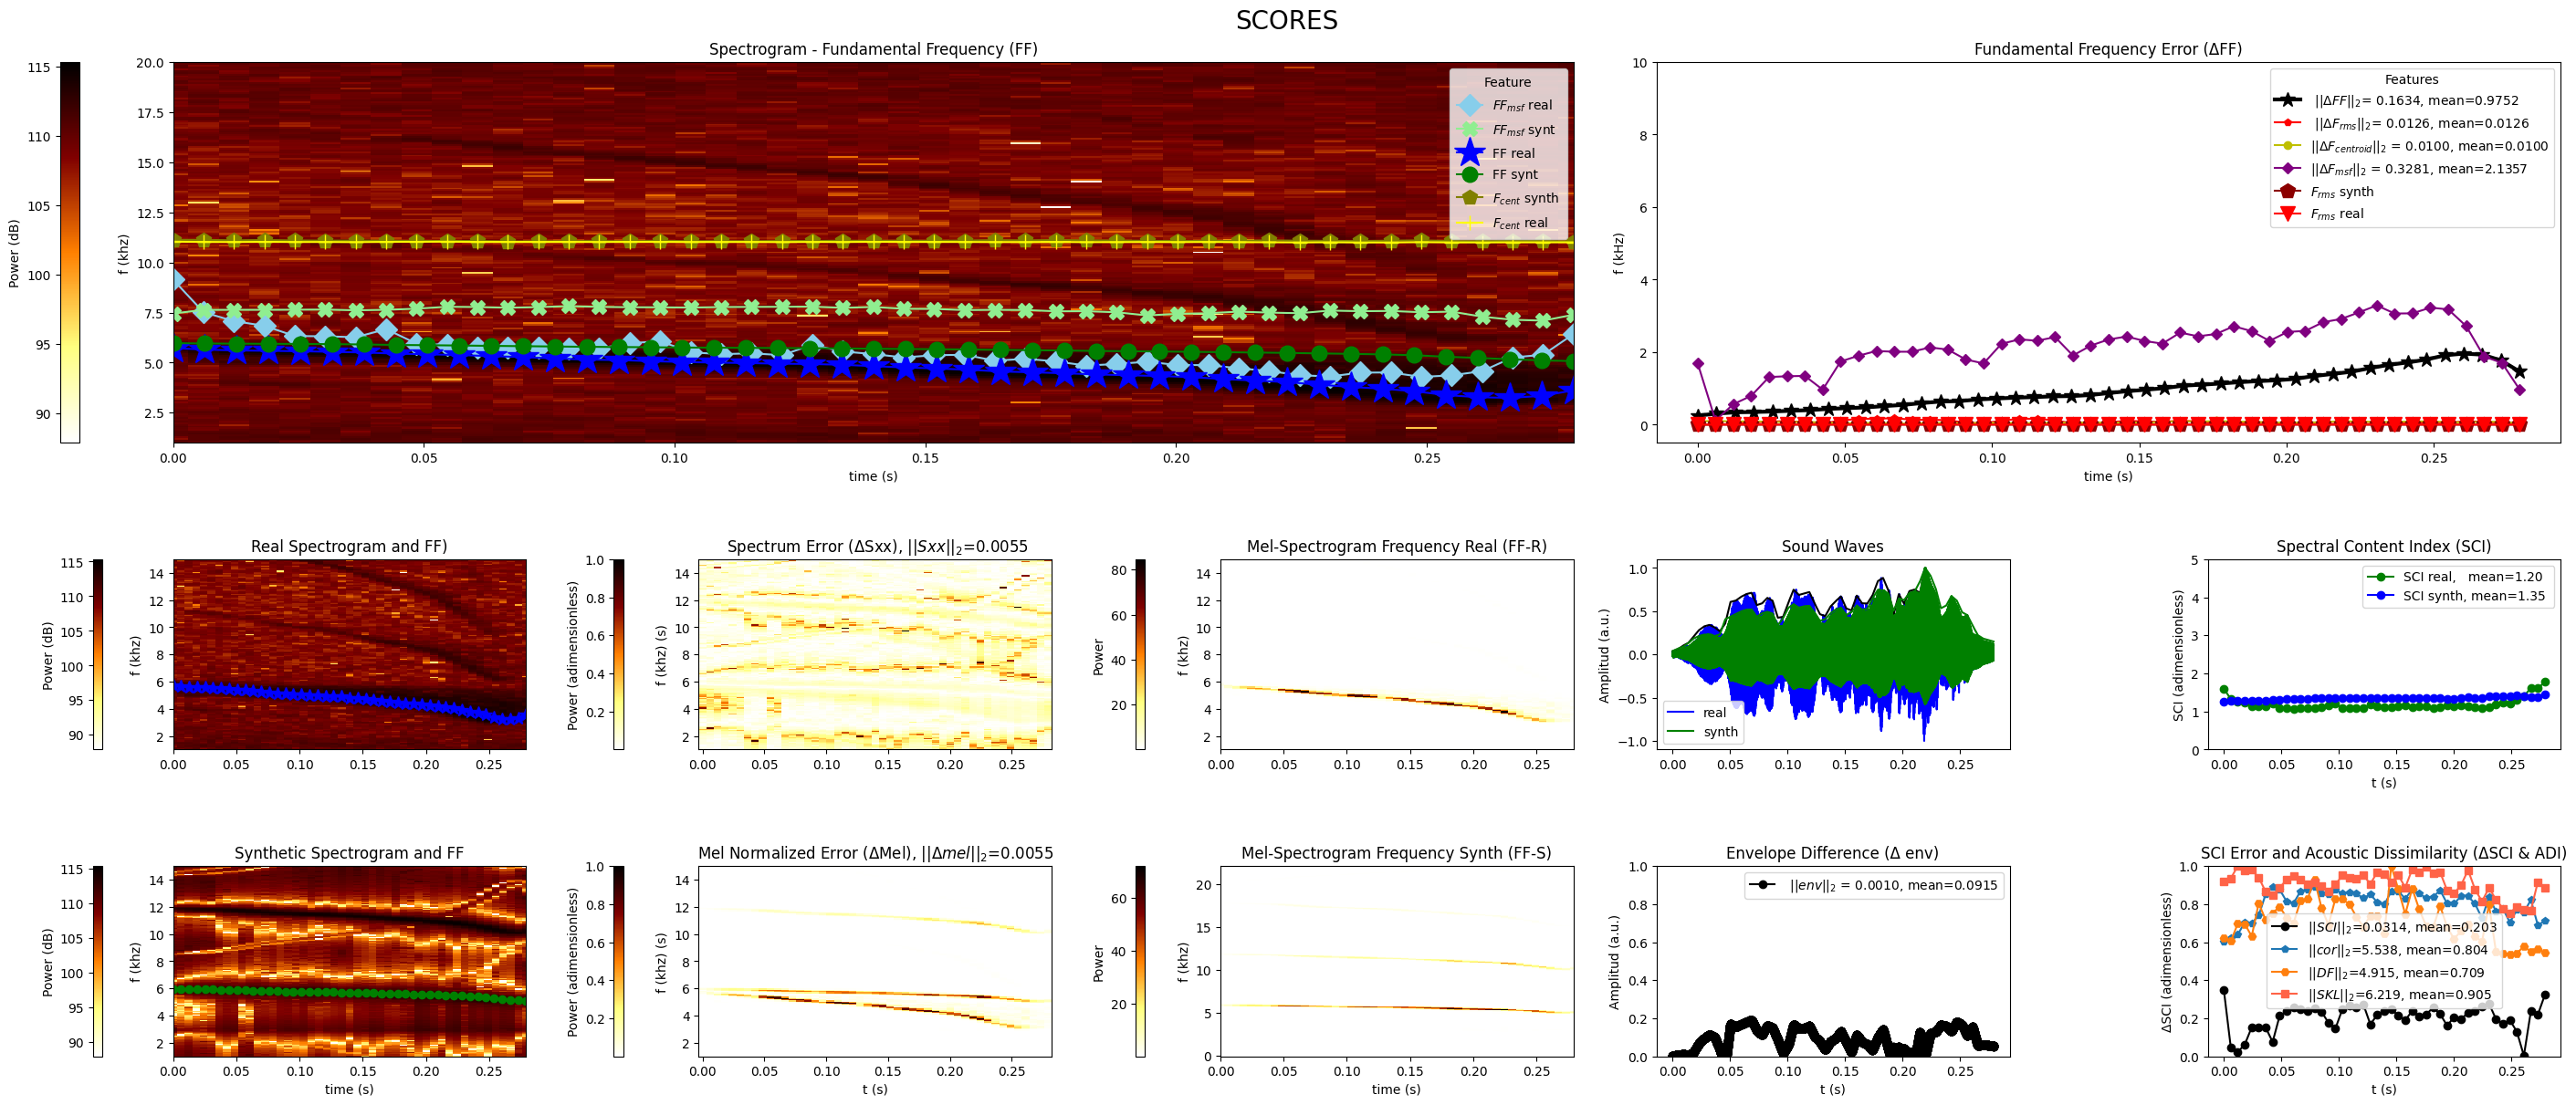

Wall time: 31.4 s


In [8]:
%%time
syllable.p["a0"].set(value=1.25)
syllable_synth = syllable.Solve(bird.p)
Display(syllable.p)

syllable_synth = syllable.Solve(syllable.p)

ploter.PlotAlphaBeta(syllable)
ploter.Plot(syllable, syllable_synth)

In [9]:
xs, ys, alpha, beta, gamma = sym.symbols('x y alpha beta gamma')
f = sym.lambdify([xs, ys], syllable.f1)
f(1,0)

C:\Users\sebas\anaconda3\lib\site-packages\sympy\printing\codeprinter.py:124: SymPyDeprecationWarning: 

The string fallback in sympify() is deprecated.

To explicitly convert the string form of an object, use
sympify(str(obj)). To add define sympify behavior on custom
objects, use sympy.core.sympify.converter or define obj._sympy_
(see the sympify() docstring).

sympify() performed the string fallback resulting in the following string:

'<function _lambdifygenerated at 0x00000134E4F65820>'

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympify-string-fallback
for details.

This has been deprecated since SymPy version 1.6. It
will be removed in a future version of SymPy.

  return sympify(expr)


SympifyError: Sympify of expression 'could not parse '<function _lambdifygenerated at 0x00000134E4F65820>'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

# Chunck i-th 

## Definition

In [ ]:
no_chunck    = 1 # int(input("Enter the number of song (1 to {0}): ".format(bird.no_chuncks)))
chunck       = bird.Chunck(no_chunck)
chunck_synth = chunck.Solve(bird.p)

## Plot

In [ ]:
Display(chunck.p)

# ploter.PlotSynth(chunck)
# ploter.PlotVs(chunck)
ploter.PlotAlphaBeta(chunck)
ploter.Plot(chunck, chunck_synth)

In [ ]:
# ploter.PlotVs(chunck_synth)
# plt.plot(chunck.Vs[:,0])
# plt.xlim((0, 500))

# All Objects

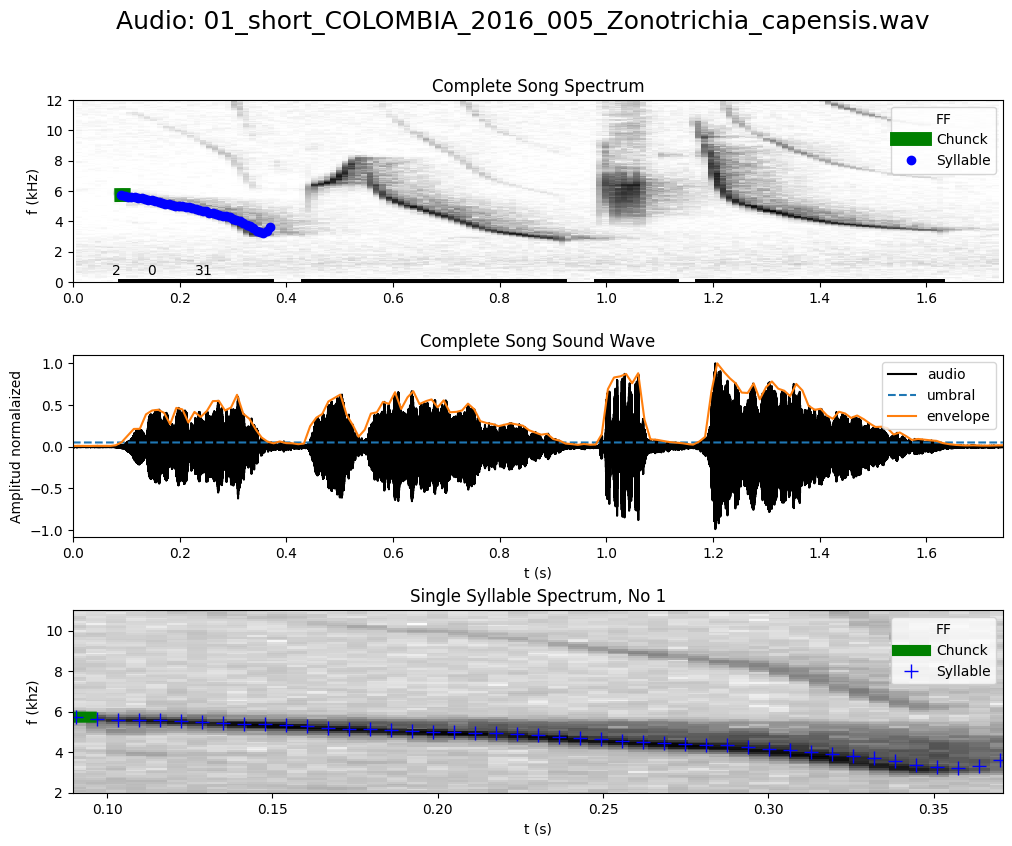

In [13]:
ploter.PlotSong(bird, syllable_on=True, chunck_on=True)

# Optimization Problem

## General Problem

General problem

\begin{equation}
\begin{aligned}
\underset{ \gamma \in \mathbb{R},\; a,b\in \mathbb{R}^2}{\text{min}} &\qquad  ||\hat{SCI}_{real} - \hat{SCI}_{synt} ( \gamma,a,b)||  + || (\hat{FF}_{real} - \hat{FF}_{synt}(\gamma,a,b)||\\
    \text { subject to }  & \qquad \gamma \in D_{\gamma}=[0.1, 100000] \\
                          & \qquad  b \in D_b=[-1,0.5]\times[0.2,2] \\
                          & \qquad  a \in D_a=[0,0.25]\times[-2,2] 
\end{aligned}
\end{equation}

with

$$
\hat{SCI} := \frac{1}{len(SCI)^2} SCI, \qquad
\hat{FF}  := \frac{1}{len(FF)^2} \frac{FF}{10 \; KHz}
$$

where $len()$ is the number of elements of the vector. 

## Auxiliar Problems

In order to solve it let's define three asociated problems

### Optimal $\gamma$

\begin{equation}
\begin{aligned}
\underset{ \gamma \in \mathbb{R}}{\text{min}} &\qquad  || \hat{SCI}_{real} - \hat{SCI}_{synt} ( \gamma)||  + || \hat{FF}_{real} - \hat{FF}_{synt}||\\
    \text { subject to }  & \qquad 10000 <  \gamma \leq 100000
\end{aligned}
\end{equation}

### Optimal $\beta$ coeficients

The second step is find the constants $b_i$

\begin{equation}
\begin{aligned}
\underset{b \in \mathbb{R}^2}{\text{min}} &\qquad || FF_{real} - FF_{synt} (b)||  \\
    \text { subject to }  & \qquad -1 <  b_0 \leq 0.5, \\
                          &\;\; \qquad 0.2 <  b_1 \leq 2
\end{aligned}
\end{equation}

with

\begin{gather}
\alpha(t) = a_0 + a_1 t, \qquad  \beta(t)=b_0  + b_1\frac{FF_{real}}{10^4} 
\end{gather}

with $t\in [0,T]$ where $T$ is the duration of the sillable (chunck).

### Optimal $\alpha$ coeficients

The coefficients $a_0$ and $a_1$ are calculated with the first harmonic 

\begin{equation}
\begin{aligned}
\underset{a \in \mathbb{R}^2}{\text{min}} &\qquad || \overline{H}_{real}^{st} - \overline{H}_{synt}^{st} (a)||  \\
    \text { subject to }  & \qquad \;\; 0 <  a_0 \leq 0.25, \\
                          & \qquad -2 <  a_1 \leq 2
\end{aligned}
\end{equation}

where $\overline{H}^{st}$ is used to represent the first harmonic amplitude.

## Minimization Solvers and Parameters

In [ ]:
brute         = {'method':'brute', 'Ns':21} #, 'workers':-1} 
DualAnnealing = {'method':'dual_annealing','max_nfev':200, 'maxiter': 100}

obj       = chunck # chunck
optimizer = Optimizer(obj, method_kwargs=brute)

In [ ]:
Display(obj.p)
obj_synth = obj.Solve(obj.p)

ploter.PlotAlphaBeta(obj)
ploter.Plot(obj, obj_synth)

You can check all the methods availables uncommenting the following line, check the **method** attribute

In [ ]:
#?lmfit.minimize

In [ ]:
Gammas = optimizer.AllGammas(bird)
#bird.p["gamma"].set(value=optimizer.optimal_gamma, vary=False)

In [ ]:
obj.p = optimizer.obj.p
optimizer.optimal_gamma

In [ ]:
obj = optimizer.obj

In [ ]:
Display(obj.p)
obj_synth = obj.Solve(obj.p)

ploter.PlotAlphaBeta(obj)
ploter.Plot(obj, obj_synth)

In [ ]:
#obj.p["gamma"].set(value=optimizer.optimal_gamma)
Display(optimizer.obj.p)

In [ ]:
optimizer.OptimalAs()
optimizer.OptimalBs()
Display(obj.p)

In [ ]:
# optimizer.OptimalParameters()
#Display(obj.p)
optimizer.obj.p

In [ ]:
obj = optimizer.obj # object solution 
#obj.p["a0"].set(value=0.1)
obj_synth = obj.Solve(obj.p)

Display(obj.p)
ploter.PlotAlphaBeta(obj)
ploter.Plot(obj, obj_synth)

Finding optimal $\gamma$, $b_0$, and $b_1$ by the brute method

In [ ]:
obj.WriteAudio()
obj_synth.WriteAudio()

## Minimization Solution

In [ ]:
#obj = syllable #syllable
#Display(obj.p)

In [ ]:
# piptrack(y=self.s, sr=self.fs, S=self.Sxx, n_fft=self.NN, hop_length=self.NN//2,
#          fmin=self.flim[0], fmax=self.flim[1], threshold=0.1, win_length=None, 
#          center=self.center, pad_mode='constant', ref=None)



In [ ]:
#magnitudes.max()

In [ ]:
#optimizer.OptimalBs(brute)

## Plot Solution

In [ ]:
Display(obj.p)
obj_synth = chunck.Solve(obj.p)

In [ ]:
Display(obj.p)

# ploter.PlotSynth(obj)
#ploter.PlotVs(obj_synth)

ploter.PlotAlphaBeta(obj)
ploter.Plot(obj, obj_synth)

## Write synthetic audio

In [ ]:
syllable.WriteAudio()
syllable_synth.WriteAudio()

# Whole Song

In [ ]:
#bird.WholeSong(brute, plot=True, syll_max=0)

## Optigam Gamma by Syllable

Calculate optimal gamma for each syllable

# Proposal Functions

In [ ]:
#y    = np.abs(np.fft.rfft(bird.silaba.out_amp)) #[5:-5]
#freq = np.fft.rfftfreq(bird.silaba.out_amp.size, d=1/bird.fs)#[5:-5]

#freq, y = freq[5:-5], y # remove inital and final peaks
#peaks, _ = find_peaks(y, distance=10, height=np.max(y)/10)
#peaks = peakutils.indexes(y, thres=0.5, min_dist=30)

#plt.plot(freq,y); #plt.xlim((1, 2e4))
#plt.plot(freq[peaks[0]], y[peaks[0]], "x")

In [ ]:
# Sxx,tn,fn,ext = sound.spectrogram(syllable.s, syllable.fs, fcrop=(2000,20000))   
# Sxx_dB = util.power2dB(Sxx)+96

# Sxx_dB_std05 = sound.smooth(Sxx_dB, std=0.5)
# Sxx_dB_std10 = sound.smooth(Sxx_dB, std=1)
# Sxx_dB_std15 = sound.smooth(Sxx_dB, std=1.5)

# import matplotlib.pyplot as plt 
# #fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
# util.plot2d(Sxx_dB,  title='original')#, vmin=10, vmax=70)
# util.plot2d(Sxx_dB_std05,   title='smooth (std=0.05)')#, vmin=10, vmax=70)
# util.plot2d(Sxx_dB_std10,   title='smooth (std=1)')#, vmin=10, vmax=70)
# util.plot2d(Sxx_dB_std15,   title='smooth (std=15.5)')#, vmin=10, vmax=70)
# fig.set_size_inches(7,9)
# fig.tight_layout()

In [ ]:

# fig, ax = plt.subplots()


# S_dB = librosa.power_to_db(s_mel)
# img = librosa.display.specshow(S_dB, x_axis='time',
#                          y_axis='mel', sr=obj.fs,
#                          fmax=8000, ax=ax)
# fig.colorbar(img, ax=ax, format='%+2.0f dB')
# ax.set(title='Mel-frequency spectrogram')

#plt.plot(times_on, onset_env, 'o')
#plt.plot(rolloff)

# feature.spectral_flatness(y=obj.s, S=None, n_fft=2048, hop_length=512, win_length=None, 
#                           center=True, pad_mode='constant', amin=1e-10, power=2.0)[source]

#fig, ax = plt.subplots()

# img2 = display.specshow(mfccs, x_axis='time', ax=ax)
# ax.set(title='HTK-style (dct_type=3)')
# fig.colorbar(img2, ax=[ax])


# img2 = display.specshow(contrast, x_axis='time', ax=ax)
# fig.colorbar(img2)
# ax.set(ylabel='Frequency bands', title='Spectral contrast')features.spectral_entropy(Sxx_power, fn, flim=(2000,10000)) 

## Video
- Create a function to make video

```` 
import os
os.system("ffmpeg -f image2 -r 1/5 -i ./images/swissGenevaLake%01d.jpg -vcodec mpeg4 -y ./videos/swissGenevaLake.mp4")
````

- Add audio to the video

````
ffmpeg -i yourvideo.avi -i sound.mp3 -c copy -map 0:v:0 -map 1:a:0 output.avi
````

# References

{cite}`perez2011python`

```{bibliography} references.bib
```
<div class="csl-entry">[1] Amador, A., Perl, Y. S., Mindlin, G. B., &#38; Margoliash, D. (2013). Elemental gesture dynamics are encoded by song premotor cortical neurons. <i>Nature 2013 495:7439</i>, <i>495</i>(7439), 59–64. <a href="https://doi.org/10.1038/nature11967">https://doi.org/10.1038/nature11967</a> </div>

<br>

<div class="csl-entry">[2] Newville, M., Stensitzki, T., Allen, D. B., &#38; Ingargiola, A. (2014). <i>LMFIT: Non-Linear Least-Square Minimization and Curve-Fitting for Python</i>. <a href="https://doi.org/10.5281/ZENODO.11813">https://doi.org/10.5281/ZENODO.11813</a> </div>
